In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white', frameon=False, fontsize=20, figsize=(12, 12))

palette_8 = {
    'Stem': '#2ca02c',
    'Endothelial-like': '#d62728',
    'Astrocyte-like': '#9467bd',
    'OPC-like': '#8c564b',
    'NPC-like': '#e377c2',
    'Mesenchymal-like': '#ff7f9e',
}



/Users/shaunie/anaconda3/envs/hu-aging/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shaunie/anaconda3/envs/hu-aging/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shaunie/anaconda3/envs/hu-aging/lib/python3.11/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.0 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.6 louvain==0.8.1 pynndescent==0.5.10


/Users/shaunie/anaconda3/envs/hu-aging/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
adata = sc.read('write/human_combined_final.h5ad')
sc.pp.log1p(adata)
# redo neighbors and umap
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=16)
sc.tl.umap(adata)

# redo louvain clustering
sc.tl.louvain(adata, resolution=0.5)
adata.obs



computing neighbors
    using 'X_pca' with n_pcs = 16


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:05)


,batch,leiden,louvain
AAACCCAAGACATCCT-1-1914_human,1914_human,0,3
AAACCCAAGCATGAAT-1-1914_human,1914_human,0,3
AAACCCAAGCTAGATA-1-1914_human,1914_human,0,4
AAACCCAAGTCCTGCG-1-1914_human,1914_human,0,3
AAACCCACAAAGGAGA-1-1914_human,1914_human,15,5
...,...,...,...
TTTGTTGCATCCTTGC-1-1919d_human,1919d_human,10,1
TTTGTTGGTGTAGTGG-1-1919d_human,1919d_human,2,1
TTTGTTGTCCATACTT-1-1919d_human,1919d_human,2,1
TTTGTTGTCCCAAGCG-1-1919d_human,1919d_human,20,2


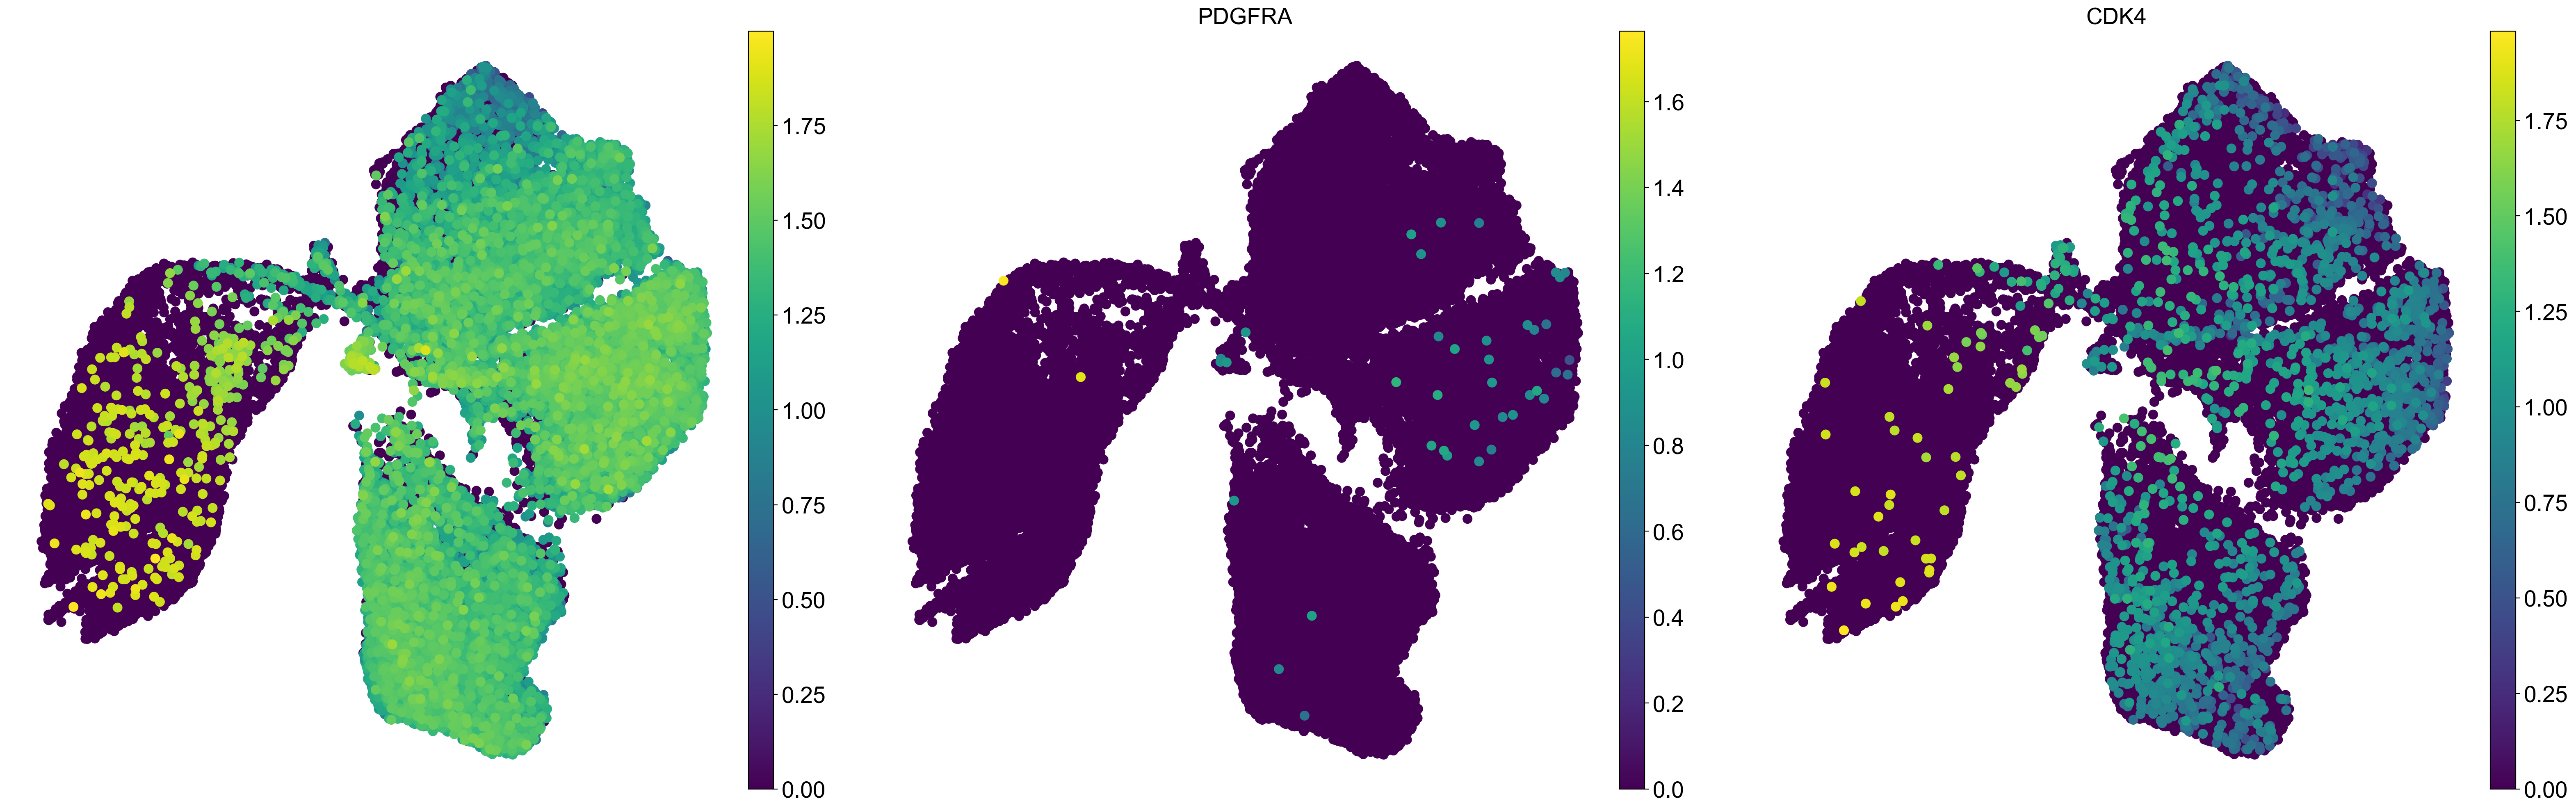

In [3]:
sc.pl.umap(adata, color=["EGFR", "PDGFRA", "CDK4"], size = 300, title='')

In [4]:
# drop cluster_f
adata.obs.drop(columns=['cluster_f'], inplace=True)
# cluster group 9 0 4
adata.obs.loc[adata.obs.louvain == '9', 'cluster_f'] = 'A'
adata.obs.loc[adata.obs.louvain == '0', 'cluster_f'] = 'A'
adata.obs.loc[adata.obs.louvain == '4', 'cluster_f'] = 'A'


# 2 8 5 6
adata.obs.loc[adata.obs.louvain == '2', 'cluster_f'] = 'B'
adata.obs.loc[adata.obs.louvain == '5', 'cluster_f'] = 'B'
adata.obs.loc[adata.obs.louvain == '6', 'cluster_f'] = 'B'

# 11 7 1 3 10
adata.obs.loc[adata.obs.louvain == '11', 'cluster_f'] = 'C'
adata.obs.loc[adata.obs.louvain == '7', 'cluster_f'] = 'C'
adata.obs.loc[adata.obs.louvain == '1', 'cluster_f'] = 'C'
adata.obs.loc[adata.obs.louvain == '3', 'cluster_f'] = 'C'
adata.obs.loc[adata.obs.louvain == '10', 'cluster_f'] = 'C'

adata.obs.loc[adata.obs.louvain == '8', 'cluster_f'] = 'D'
adata.obs.loc[adata.obs.louvain == '13', 'cluster_f'] = 'D'
adata.obs.loc[adata.obs.louvain == '16', 'cluster_f'] = 'D'
adata.obs.loc[adata.obs.louvain == '14', 'cluster_f'] = 'D'
adata.obs.loc[adata.obs.louvain == '17', 'cluster_f'] = 'D'
adata.obs.loc[adata.obs.louvain == '12', 'cluster_f'] = 'D'

adata.obs.loc[adata.obs.louvain == '15', 'cluster_f'] = 'E'





KeyError: "['cluster_f'] not found in axis"

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, ncols=5, fontsize=20, title='')
# convert each one to a list
A = adata.uns['rank_genes_groups']['names']['A'].tolist()
B = adata.uns['rank_genes_groups']['names']['B'].tolist()
C = adata.uns['rank_genes_groups']['names']['C'].tolist()
D = adata.uns['rank_genes_groups']['names']['D'].tolist()

# join A with \n 
C = '\n'.join(C)
print(C)

In [ ]:
# differentiated genes between B and A
# log data
sc.tl.rank_genes_groups(adata, 'cluster_f', method='t-test')